# Ag-Analytics® - NAIP Service

National Agricultural Imagery Program (NAIP) provides US nationwide, high-resolution aerial imagery. The data is collected in each state every 3-5 years during the agricultural growing season at 1 m resolution. The default spectral bands for NAIP is natural color(R,G,B). Since 2007, some states have been delivered with R,G,B, and NIR. For the data coverage, please check [HERE](https://www.arcgis.com/home/webmap/viewer.html?webmap=17944d45bbef42afb05a5652d7c28aa5).

The Ag-Analytics NAIP Service API provides users with easy and fast access to imagery from NAIP with of the  area of interest and certain calendaer years. 

### Required libraries

In [54]:
import requests
import json
import time
import os
import numpy as np
import rasterio
from rasterio.plot import show
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import ipywidgets as widgets
import IPython.display as display

### Request Parameters

1). __boundary(Required)__ (.tif, .shp, GeoJSON String): Area of interest as either TIFF file, shapefile(in zip), or Geojson string containing boundary coordinates. The maximum aoi area must be less than 200 square miles (518 sq km).
       
2). __years(Required)__(List as string): List of years of interests as String


3). __Projection(Optional)__ (string): Projection of result GeoTiff.
    
    Formatted as EPSG code, WKT, or PROJ.4.

4). __Resolution(Optional)__ (Float): Output GeoTIFF resolution.

    Specified in the units of the projection. E.g., 8-meters in WGS84 ~0.0001 degrees.
    
5). __result_type(Optional)__(string): The type of response: either the GeoTIFF on server or an image/png;base64

    E.g.: 'png' or 'tif'
    
6). __result_type(Optional)__(string): Color composition of the NAIP imagery.

    E.g.: 'True_color' or 'False_color'.


### Request Examples

#### A.Request for PNG

In [126]:
#PNG
AOI ='{"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[-89.199484,40.972729],[-89.199773,40.97258],[-89.200135,40.972415],[-89.20034,40.972318],[-89.200445,40.972177],[-89.200439,40.972001],[-89.200404,40.971815],[-89.200245,40.971599],[-89.20004,40.971397],[-89.199869,40.971233],[-89.199865,40.971097],[-89.199952,40.970952],[-89.200264,40.97078],[-89.200517,40.970664],[-89.200903,40.970471],[-89.201168,40.970345],[-89.201324,40.970277],[-89.201407,40.970174],[-89.201428,40.970042],[-89.20271,40.970005],[-89.202738,40.970421],[-89.202844,40.970431],[-89.202851,40.970648],[-89.203123,40.970666],[-89.203216,40.973626],[-89.20332,40.973635],[-89.203281,40.972154],[-89.203277,40.972049],[-89.203227,40.970607],[-89.204645,40.97055],[-89.204639,40.970427],[-89.205456,40.970446],[-89.205638,40.970467],[-89.206002,40.970527],[-89.206306,40.97059],[-89.206516,40.970642],[-89.206711,40.97061],[-89.20688,40.970542],[-89.207086,40.970492],[-89.207267,40.970414],[-89.207449,40.970364],[-89.207667,40.970286],[-89.207849,40.970255],[-89.208057,40.970251],[-89.208287,40.970328],[-89.208494,40.970369],[-89.208672,40.970421],[-89.208866,40.970506],[-89.208972,40.970511],[-89.209009,40.970595],[-89.20893,40.970671],[-89.208736,40.970787],[-89.208535,40.970909],[-89.208325,40.971052],[-89.207907,40.971306],[-89.207633,40.971478],[-89.207313,40.971574],[-89.207065,40.971645],[-89.206566,40.971699],[-89.206246,40.971784],[-89.205998,40.971878],[-89.205548,40.972042],[-89.205013,40.97232],[-89.20468,40.972494],[-89.204246,40.972725],[-89.203988,40.972931],[-89.203819,40.973168],[-89.203666,40.973428],[-89.203616,40.973685],[-89.203552,40.973966],[-89.203548,40.9743],[-89.203411,40.974615],[-89.203284,40.974906],[-89.202723,40.975587],[-89.20283,40.975719],[-89.203383,40.975106],[-89.203522,40.974847],[-89.203658,40.974521],[-89.203723,40.974241],[-89.20381,40.97376],[-89.203891,40.973546],[-89.20407,40.973197],[-89.204197,40.973016],[-89.204369,40.972868],[-89.204686,40.972672],[-89.205018,40.972499],[-89.205351,40.972314],[-89.205742,40.972139],[-89.206047,40.971999],[-89.206367,40.971904],[-89.206907,40.971771],[-89.207303,40.971719],[-89.207551,40.971658],[-89.207846,40.971535],[-89.207938,40.971481],[-89.208059,40.971448],[-89.208267,40.971295],[-89.208534,40.971115],[-89.209089,40.970762],[-89.209108,40.971493],[-89.209143,40.972829],[-89.209176,40.974108],[-89.209236,40.977186],[-89.20442,40.977285],[-89.199613,40.977383],[-89.199533,40.974593],[-89.199484,40.972729]]]}}'
values = {'boundary': AOI,
          'years':"['2015','2017']",
         'display_option': 'False_color',
         'result_type':'png',
         'Projection': '4326',
         'Resolution':'0.00001'}
headers = {'Content-Type': 'application/x-www-form-urlencoded'}

#### B.Request for TIF

In [129]:
#TIF
AOI ='{"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[-89.199484,40.972729],[-89.199773,40.97258],[-89.200135,40.972415],[-89.20034,40.972318],[-89.200445,40.972177],[-89.200439,40.972001],[-89.200404,40.971815],[-89.200245,40.971599],[-89.20004,40.971397],[-89.199869,40.971233],[-89.199865,40.971097],[-89.199952,40.970952],[-89.200264,40.97078],[-89.200517,40.970664],[-89.200903,40.970471],[-89.201168,40.970345],[-89.201324,40.970277],[-89.201407,40.970174],[-89.201428,40.970042],[-89.20271,40.970005],[-89.202738,40.970421],[-89.202844,40.970431],[-89.202851,40.970648],[-89.203123,40.970666],[-89.203216,40.973626],[-89.20332,40.973635],[-89.203281,40.972154],[-89.203277,40.972049],[-89.203227,40.970607],[-89.204645,40.97055],[-89.204639,40.970427],[-89.205456,40.970446],[-89.205638,40.970467],[-89.206002,40.970527],[-89.206306,40.97059],[-89.206516,40.970642],[-89.206711,40.97061],[-89.20688,40.970542],[-89.207086,40.970492],[-89.207267,40.970414],[-89.207449,40.970364],[-89.207667,40.970286],[-89.207849,40.970255],[-89.208057,40.970251],[-89.208287,40.970328],[-89.208494,40.970369],[-89.208672,40.970421],[-89.208866,40.970506],[-89.208972,40.970511],[-89.209009,40.970595],[-89.20893,40.970671],[-89.208736,40.970787],[-89.208535,40.970909],[-89.208325,40.971052],[-89.207907,40.971306],[-89.207633,40.971478],[-89.207313,40.971574],[-89.207065,40.971645],[-89.206566,40.971699],[-89.206246,40.971784],[-89.205998,40.971878],[-89.205548,40.972042],[-89.205013,40.97232],[-89.20468,40.972494],[-89.204246,40.972725],[-89.203988,40.972931],[-89.203819,40.973168],[-89.203666,40.973428],[-89.203616,40.973685],[-89.203552,40.973966],[-89.203548,40.9743],[-89.203411,40.974615],[-89.203284,40.974906],[-89.202723,40.975587],[-89.20283,40.975719],[-89.203383,40.975106],[-89.203522,40.974847],[-89.203658,40.974521],[-89.203723,40.974241],[-89.20381,40.97376],[-89.203891,40.973546],[-89.20407,40.973197],[-89.204197,40.973016],[-89.204369,40.972868],[-89.204686,40.972672],[-89.205018,40.972499],[-89.205351,40.972314],[-89.205742,40.972139],[-89.206047,40.971999],[-89.206367,40.971904],[-89.206907,40.971771],[-89.207303,40.971719],[-89.207551,40.971658],[-89.207846,40.971535],[-89.207938,40.971481],[-89.208059,40.971448],[-89.208267,40.971295],[-89.208534,40.971115],[-89.209089,40.970762],[-89.209108,40.971493],[-89.209143,40.972829],[-89.209176,40.974108],[-89.209236,40.977186],[-89.20442,40.977285],[-89.199613,40.977383],[-89.199533,40.974593],[-89.199484,40.972729]]]}}'

values = {'boundary': AOI,
         'years':"['2015','2017']",
         'display_option': 'True_color',
         'result_type':'tif',
         'Projection': '4326',
         'Resolution':'0.00001'}
headers = {'Content-Type': 'application/x-www-form-urlencoded'}

### API Fuction

In [119]:
def Get_NAIP_Image(values,headers):
    try:

        url = "https://ag-analytics.azure-api.net/naip"
     
        response = requests.post(url, data=values,headers= headers).json()
        
        print(response)

        return response
    
    except Exception as e:
        print(e)
        raise e

In [131]:
NAIP_response = Get_NAIP_Image(values,headers)

{'2015': 'result_raster_NAIP_epsg4326_resolution_1e-05_69924.tif', '2017': 'result_raster_NAIP_epsg4326_resolution_1e-05_80562.tif'}


### Display PNG from Request

In [123]:
#Fetch the response
png2015 = NAIP_response['2015']
png2017 = NAIP_response['2017']

In [124]:
# display images
Image(url = png2015, width= 600, height =600)

In [125]:
Image(url = png2017, width= 600, height =600)

# GET Request

### Get Request Parameters

In [95]:
# Specify local path where file will be downloaded.
# local_path = r"C:\<Path to download directory>" # E.g., r"C:\Users\John_Doe\Documents\rasters"


# Create GET request payload.
year = 2017 # same as the year in post request
values = {'FileName': NAIP_response[str(year)]}

### Download Function

In [81]:
def download_NAIP(values, local_path):
    try:
        url = "https://ag-analytics.azure-api.net/naip"
     
        download_path = os.path.join(local_path, values['FileName'])
     
        response = requests.get(url, params=values)
        open(download_path, 'wb').write(response.content)
        
        print(response.url)

        return response
    
    except Exception as e:
        print(e)
        raise e

In [96]:
download_NAIP(values, local_path)

https://agflaskdev.eastus2.cloudapp.azure.com/flask_api/api/v1.0/NAIP_Service_API/download_NAIP?FileName=result_raster_NAIP_epsg4326_resolution_1e-05_87092.tif


<Response [200]>

### Display Function

In [86]:
def display_naip_clip(naip_clip):
    
    assert(os.path.isfile(naip_clip))
    
    # NAIP tiles are in high resolution; downsize for plotting in this notebook
    dsfactor = 1
    
    with rasterio.open(naip_clip) as raster:

        # NAIP imagery has four channels: R, G, B, IR
        #
        # Stack RGB channels into an image; we won't try to render the IR channel
        #
        # rasterio uses 1-based indexing for channels.
        h = int(raster.height/dsfactor)
        w = int(raster.width/dsfactor)
        print('Resampling to {},{}'.format(h,w))
        r = raster.read(1, out_shape=(1, h, w))
        g = raster.read(2, out_shape=(1, h, w))
        b = raster.read(3, out_shape=(1, h, w))        
    
    rgb = np.dstack((r,g,b))
    fig = plt.figure(figsize=(10, 10), dpi=100, edgecolor='k')
    plt.imshow(rgb)
    raster.close()

In [ ]:
localfile_path = os.path.join(local_path, values['FileName'])
print(localfile_path)


### Display the NAIP Clip

Resampling to 737,977


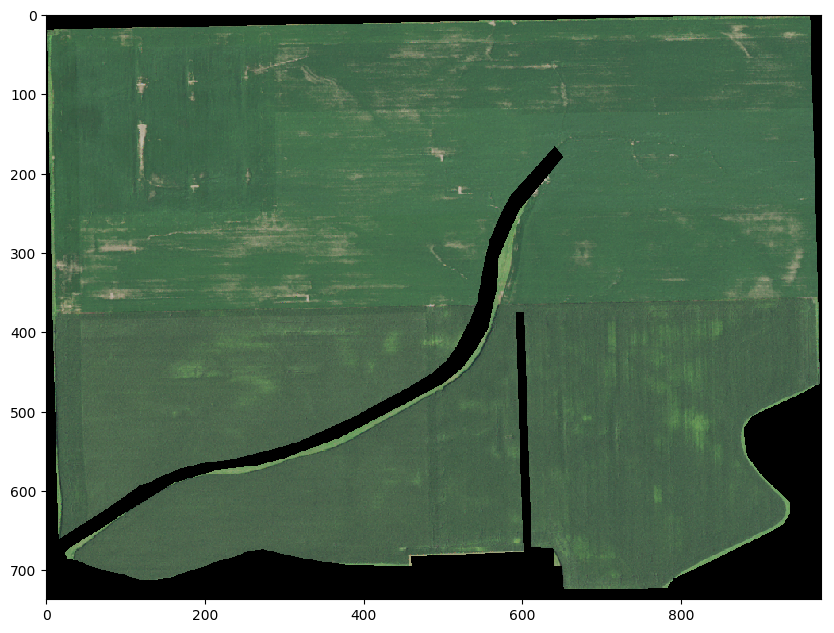

In [101]:
display_naip_clip(localfile_path)

Resampling to 737,977


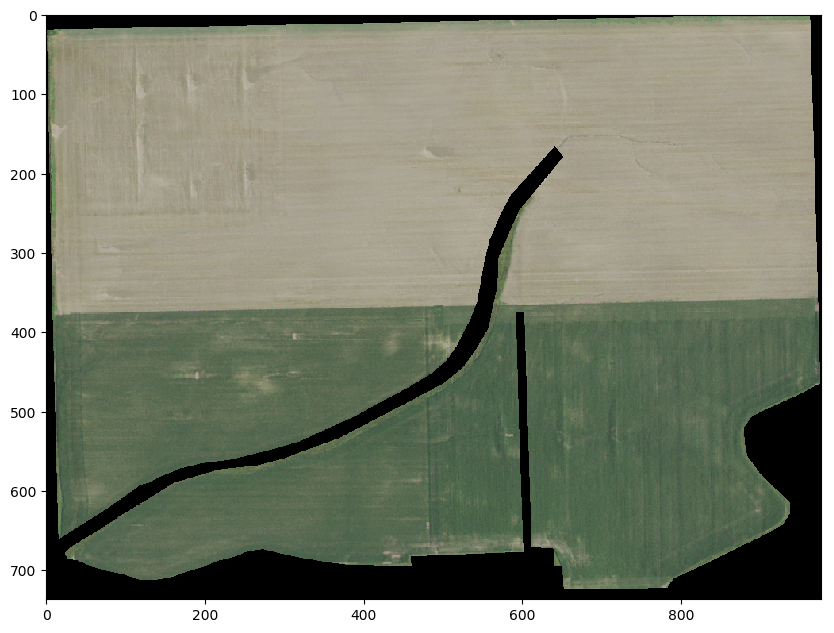

In [100]:
display_naip_clip(path2017)